In [66]:
import numpy as np

from matplotlib import pyplot as plt

In [67]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def two_layers_forward(X, W, B, activation_function):
    '''
    Layer 1 (z_ii_1 linear, a non-linear activated layer)
    x: input
    w: weights
    b: bias

    Layer 2 (z_ii_2 linear)
    
    '''
    z_11_1 = W[0] * X[0] + W[1] * X[1] + B[0]
    z_12_1 = W[2] * X[0] + W[3] * X[1] + B[1]
    a_11_1 = activation_function(z_11_1)
    a_12_1 = activation_function(z_12_1)

    z_11_2 = W[4] * a_11_1 + W[5] * a_12_1 + B[2]

    forward = z_11_2
    return forward


def loss_function(y, y_hat):
    return  abs(y - y_hat) ** 2


def L_partial_yhat(y, y_hat):
  return (-2) * (y - y_hat)


def sigmoid_diff(x):
  return (sigmoid(x) * (1 - (sigmoid(x))))


def partial_derivate_respect(param, X, y ,y_hat, W, B,) -> float:
  if param == 'w_11_1':
    z111 = W[0] * X[0] + W[1] * X[1] + B[0]
    return L_partial_yhat(y, y_hat) * W[5] * sigmoid_diff(z111) * X[0]
  elif param == 'w_12_1':
    z111 = W[0] * X[0] + W[1] * X[1] + B[0]
    return L_partial_yhat(y, y_hat) * W[5] * sigmoid_diff(z111) * X[1]
  elif param == 'w_21_1':
    z121 = W[2] * X[0] + W[3] * X[1] + B[1]
    return L_partial_yhat(y, y_hat) * W[4] * sigmoid_diff(z121) * X[0]
  elif param == 'w_22_1':
    z121 = W[2] * X[0] + W[3] * X[1] + B[1]
    return L_partial_yhat(y, y_hat) * W[4] * sigmoid_diff(z121) * X[1]
  elif param == 'w_11_2':
    z111 = W[0] * X[0] + W[1] * X[1] + B[0]
    return L_partial_yhat(y, y_hat) * sigmoid(z111)
  elif param == 'w_12_2':
    z121 = W[2] * X[0] + W[3] * X[1] + B[1]
    return L_partial_yhat(y, y_hat) * sigmoid(z121)
  elif param == 'b_11':
    return L_partial_yhat(y, y_hat) * W[5] * sigmoid_diff(W[0] * X[0] + W[1] * X[0] + B[0]) * 1
  elif param == 'b_21':
    return L_partial_yhat(y, y_hat) * W[4] * sigmoid_diff(W[2] * X[0] + W[3] * X[1] + B[1]) * 1
  elif param == 'b_12':
    return L_partial_yhat(y, y_hat) * 1


def stochastic_gradient_descent(epochs, X, activation_function):
    '''
    Initializes weight (len=6) and bias (len=3) values using uniform distribution U(0, 1)
    Loops over epochs
    Loops over inputs
    Computes forward
    Computes error
    Computes backpropagation
    Updates weights and bias values
    Computes MSE
    Saves values for processing
    '''

    W = np.random.uniform(0, 1, 6)
    B = np.random.uniform(0, 1, 3)

    errors = []
    mse = []

    for epoch in range(epochs):
        for x in X:
            y_hat = two_layers_forward(x, W, B, activation_function)
            y = bool(x[0]) ^ bool(x[1])

            W[0] = W[0] - learning_rate * partial_derivate_respect('w_11_1', x, y, y_hat, W, B)
            W[1] = W[1] - learning_rate * partial_derivate_respect('w_12_1', x, y, y_hat, W, B)
            W[2] = W[2] - learning_rate * partial_derivate_respect('w_21_1', x, y, y_hat, W, B)
            W[3] = W[3] - learning_rate * partial_derivate_respect('w_22_1', x, y, y_hat, W, B)
            W[4] = W[4] - learning_rate * partial_derivate_respect('w_11_2', x, y, y_hat, W, B)
            W[5] = W[5] - learning_rate * partial_derivate_respect('w_12_2', x, y, y_hat, W, B)
            B[0] = B[0] - learning_rate * partial_derivate_respect('b_11', x, y, y_hat, W, B)
            B[1] = B[1] - learning_rate * partial_derivate_respect('b_21', x, y, y_hat, W, B)
            B[2] = B[2] - learning_rate * partial_derivate_respect('b_12', x, y, y_hat, W, B)
    
            error = loss_function(y, y_hat)
            errors.append(error)

        mse.append(0.25 * error)

    return W, B, errors, mse


In [68]:
X = np.array([[0,0], [0,1], [1,0], [1,1]]) # Inputs (x_1, x_2)
Y = np.array([0, 1, 1, 0]) # Labels (y = x_1 XOR x_2)

activation_function = sigmoid
epochs = 100
learning_rate = 0.01

W, B, errors, mse = stochastic_gradient_descent(epochs, X, activation_function)

print(f'W = {W} \nB = {B} \nMSE = {mse[-1]}')

W = [0.79082708 0.78700332 0.6704765  0.43072896 0.23748955 0.30304499] 
B = [0.62557398 0.04158075 0.11415754] 
MSE = 0.08580924096487397


Text(0, 0.5, 'MSE')

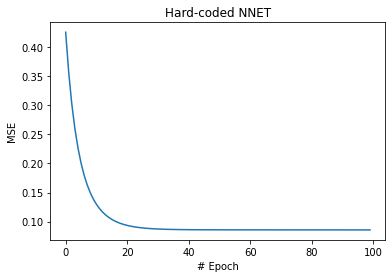

In [69]:
epochs_ = np.arange(epochs)

plt.plot(epochs_, mse)
plt.title("Hard-coded NNET")
plt.xlabel("# Epoch")
plt.ylabel("MSE")